#  <font color='red'> Yapay Zeka Ara Sınav  Soru 3 </font>
Tolga HASTAOĞLU 21040201015

Aşağıdaki veri setlerinden birini kullanarak. Bu veri seti üzerinde aşağıdaki sınıflandırma
yöntemlerini kullanınız. Her bir sınıflandırıcıdan alınan sonuçları ( Accuracy, Precision,
Recall,F1-Score ) tablo halinde sonuçlarını gösteriniz. Rapora sonuçlarını ve karışıklık
Matrisi (Confusion Matrix)lerini yazınız/çiziniz.
 Karar Ağaçları (Decision tree)
 Rastgele Orman (Random Forest)
 Lojistik Regresyon
 K-en yakın komşu (k-Nearest Neighbors classifier)

In [93]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix

In [2]:
veriSeti=pd.read_csv("insurance.csv")
veriSeti

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
sex_labels=["male","female"]
sex_encoder=preprocessing.LabelEncoder()
sex_encoder.fit(sex_labels)
veriSeti["sex"]=sex_encoder.transform(veriSeti["sex"])

In [4]:
smoker_labels=["yes","no"]
smoker_encoder=preprocessing.LabelEncoder()
smoker_encoder.fit(smoker_labels)
veriSeti["smoker"]=smoker_encoder.transform(veriSeti["smoker"])

In [5]:
region_labels=["southwest","southeast","northwest","northeast"]
region_encoder=preprocessing.LabelEncoder()
region_encoder.fit(region_labels)
veriSeti["region"]=region_encoder.transform(veriSeti["region"])

In [6]:
maksimum=veriSeti["charges"].max()
minimum=veriSeti["charges"].min()
print("sütun minimumum : "+ str(minimum)+ ", sütun maksimumu: "+ str(maksimum))

sütun minimumum : 1121.8739, sütun maksimumu: 63770.42801


Yukarıda maksimum ve minimum girilen değerlere göre 10 sınıf oluşturmak için 5000'lik ayrımlarda sınıflar oluşturulacaktır.

In [7]:
veriSeti['charges_categorical'] = pd.cut(veriSeti["charges"], bins=[0, 5000, 10000,15000,20000,25000,30000,35000,40000,45000,50000,100000],
                    labels=[0,1,2,3,4,5,6,7,8,9,10])
veriSeti['charges_categorical']=veriSeti['charges_categorical'].astype(int)

In [8]:
veriSeti

,age,sex,bmi,children,smoker,region,charges,charges_categorical
0,19,0,27.900,0,1,3,16884.92400,3
1,18,1,33.770,1,0,2,1725.55230,0
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,4
4,32,1,28.880,0,0,1,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,2
1334,18,0,31.920,0,0,0,2205.98080,0
1335,18,0,36.850,0,0,2,1629.83350,0
1336,21,0,25.800,0,0,3,2007.94500,0


Veriler kagegorik hale getirilmiş olup sayısal olup olmadığı kontrol edilmiştir.

In [9]:
veriSeti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1338 non-null   int64  
 1   sex                  1338 non-null   int32  
 2   bmi                  1338 non-null   float64
 3   children             1338 non-null   int64  
 4   smoker               1338 non-null   int32  
 5   region               1338 non-null   int32  
 6   charges              1338 non-null   float64
 7   charges_categorical  1338 non-null   int32  
dtypes: float64(2), int32(4), int64(2)
memory usage: 62.8 KB


yinelenen değer kontrolü yapılacak ve yinelenen değer varsa silinecektir

In [10]:
veriSeti[veriSeti.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges,charges_categorical
581,19,1,30.59,0,0,1,1639.5631,0


In [11]:
veriSeti.drop([581], axis=0, inplace=True)

In [12]:
veriSeti[veriSeti.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges,charges_categorical


Yinelene veri de kalmamıştır artık veri temizliği tamamlanmıştı önce öznitelik önemliliğine ve skorlarına bakılacak sonrasında da analizlere başlanılacaktır.

In [13]:
X = veriSeti.iloc[:,0:6] 
y = veriSeti.iloc[:,-1] 

[0.5101563  0.01738401 0.20772513 0.08733895 0.12236184 0.05503377]


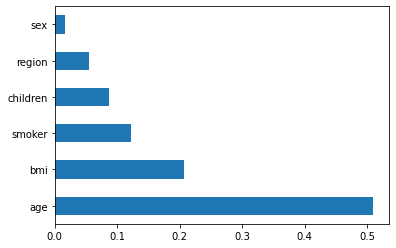

In [14]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
oznitelik_onemliligi = pd.Series(model.feature_importances_, index=X.
columns)
oznitelik_onemliligi.nlargest(15).plot(kind='barh')
plt.show()

In [15]:
bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['degişken','score']
print(scores.nlargest(15,'score'))

   degişken       score
4    smoker  341.575150
0       age  225.483387
2       bmi   15.735688
3  children    8.541967
1       sex    1.772899
5    region    1.175579


#  <font color="green">Karar Ağaçları (Decision Tree) ile sınıflama ve sonuçları</font>

In [26]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [28]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[73  3  3  3  1  2  0  0  0  0  0]
 [ 5 82  5  0  3  3  0  0  0  0  0]
 [ 2  1 41  2  4  2  3  0  0  0  0]
 [ 5  1  1 11  0  0  0  3  0  0  0]
 [ 2  0  3  2  8  0  0  1  0  0  0]
 [ 0  6  5  1  1  1  2  0  0  0  0]
 [ 0  0  0  1  0  1  5  0  0  0  0]
 [ 0  0  2  0  0  0  1  6  3  0  1]
 [ 0  0  0  0  0  0  0  4  4  1  1]
 [ 0  0  0  0  0  0  0  0  0 10  2]
 [ 0  0  0  0  0  0  0  1  0  1  0]]


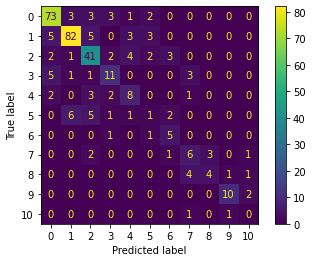

In [33]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [34]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        85
           1       0.88      0.84      0.86        98
           2       0.68      0.75      0.71        55
           3       0.55      0.52      0.54        21
           4       0.47      0.50      0.48        16
           5       0.11      0.06      0.08        16
           6       0.45      0.71      0.56         7
           7       0.40      0.46      0.43        13
           8       0.57      0.40      0.47        10
           9       0.83      0.83      0.83        12
          10       0.00      0.00      0.00         2

    accuracy                           0.72       335
   macro avg       0.53      0.54      0.53       335
weighted avg       0.72      0.72      0.72       335



In [35]:
veriSeti1=veriSeti.copy()
veriSeti1.drop("region",axis=1,inplace=True)
X = veriSeti1.iloc[:,0:5] 
y = veriSeti1.iloc[:,-1] 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[76  1  3  3  0  2  0  0  0  0  0]
 [ 9 78  4  1  3  1  2  0  0  0  0]
 [ 2  4 39  3  3  0  4  0  0  0  0]
 [ 6  0  1  9  4  0  0  1  0  0  0]
 [ 1  1  3  1  9  0  0  1  0  0  0]
 [ 0  7  6  1  1  1  0  0  0  0  0]
 [ 0  0  0  1  0  1  5  0  0  0  0]
 [ 0  0  2  0  0  0  1  7  3  0  0]
 [ 0  0  0  0  0  0  0  4  4  1  1]
 [ 0  0  0  0  0  0  0  0  0 10  2]
 [ 0  0  0  0  0  0  0  1  0  1  0]]


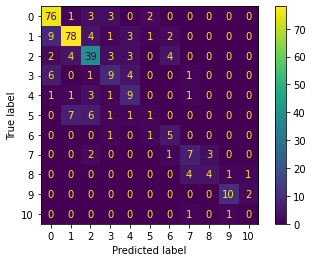

In [37]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [38]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        85
           1       0.86      0.80      0.83        98
           2       0.67      0.71      0.69        55
           3       0.47      0.43      0.45        21
           4       0.45      0.56      0.50        16
           5       0.20      0.06      0.10        16
           6       0.42      0.71      0.53         7
           7       0.50      0.54      0.52        13
           8       0.57      0.40      0.47        10
           9       0.83      0.83      0.83        12
          10       0.00      0.00      0.00         2

    accuracy                           0.71       335
   macro avg       0.53      0.54      0.52       335
weighted avg       0.70      0.71      0.70       335



In [39]:
veriSeti2=veriSeti1.copy()
veriSeti2.drop("sex",axis=1,inplace=True)
X = veriSeti2.iloc[:,0:4] 
y = veriSeti2.iloc[:,-1] 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[74  2  3  3  1  2  0  0  0  0  0]
 [ 9 77  4  3  2  1  2  0  0  0  0]
 [ 2  2 40  2  5  0  4  0  0  0  0]
 [ 6  0  1  9  4  0  0  1  0  0  0]
 [ 1  1  3  1  8  1  0  1  0  0  0]
 [ 0  5  7  1  1  1  1  0  0  0  0]
 [ 0  0  0  1  0  1  4  1  0  0  0]
 [ 0  0  2  0  0  0  1  8  2  0  0]
 [ 0  0  0  0  0  0  0  5  4  1  0]
 [ 0  0  0  0  0  0  0  0  0 10  2]
 [ 0  0  0  0  0  0  0  1  0  1  0]]


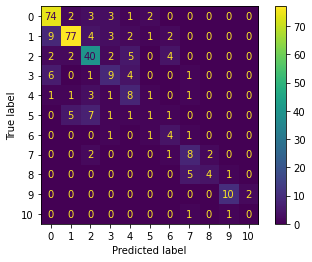

In [41]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [42]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84        85
           1       0.89      0.79      0.83        98
           2       0.67      0.73      0.70        55
           3       0.45      0.43      0.44        21
           4       0.38      0.50      0.43        16
           5       0.17      0.06      0.09        16
           6       0.33      0.57      0.42         7
           7       0.47      0.62      0.53        13
           8       0.67      0.40      0.50        10
           9       0.83      0.83      0.83        12
          10       0.00      0.00      0.00         2

    accuracy                           0.70       335
   macro avg       0.51      0.53      0.51       335
weighted avg       0.70      0.70      0.70       335



# <font color="green">Random Forest ile Sınıflama ve Sonuçları<f/ont>

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
X = veriSeti.iloc[:,0:6] 
y = veriSeti.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [46]:
classifier = RandomForestClassifier(n_estimators=100, max_features="auto", random_state=44)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[82  2  1  0  0  0  0  0  0  0  0]
 [ 7 89  2  0  0  0  0  0  0  0  0]
 [ 3  1 46  5  0  0  0  0  0  0  0]
 [ 5  1  2 12  1  0  0  0  0  0  0]
 [ 2  0  4  0 10  0  0  0  0  0  0]
 [ 0  7  6  1  1  1  0  0  0  0  0]
 [ 0  0  0  2  0  1  4  0  0  0  0]
 [ 0  0  2  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  4  5  0  1]
 [ 0  0  0  0  0  0  0  0  1 11  0]
 [ 0  0  0  0  0  0  0  1  0  1  0]]


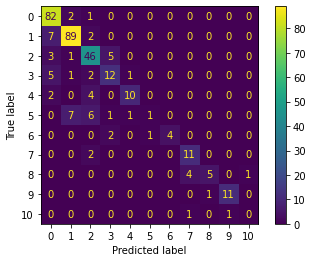

In [47]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [48]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        85
           1       0.89      0.91      0.90        98
           2       0.73      0.84      0.78        55
           3       0.60      0.57      0.59        21
           4       0.83      0.62      0.71        16
           5       0.50      0.06      0.11        16
           6       1.00      0.57      0.73         7
           7       0.69      0.85      0.76        13
           8       0.83      0.50      0.62        10
           9       0.92      0.92      0.92        12
          10       0.00      0.00      0.00         2

    accuracy                           0.81       335
   macro avg       0.71      0.62      0.64       335
weighted avg       0.80      0.81      0.79       335



In [49]:
veriSeti1=veriSeti.copy()
veriSeti1.drop("region",axis=1,inplace=True)
X = veriSeti1.iloc[:,0:5] 
y = veriSeti1.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [50]:
classifier = RandomForestClassifier(n_estimators=100, max_features="auto", random_state=4)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  1  0  0  0  0  0  0  0  0  0]
 [ 8 87  3  0  0  0  0  0  0  0  0]
 [ 3  1 47  3  1  0  0  0  0  0  0]
 [ 6  0  2 10  3  0  0  0  0  0  0]
 [ 1  2  3  1  8  0  0  1  0  0  0]
 [ 0  6  7  1  1  1  0  0  0  0  0]
 [ 0  0  0  1  0  1  5  0  0  0  0]
 [ 0  0  2  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  5  5  0  0]
 [ 0  0  0  0  0  0  0  0  1 11  0]
 [ 0  0  0  0  0  0  0  1  0  1  0]]


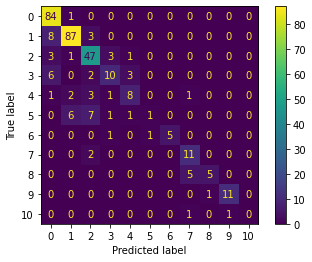

In [51]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [52]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90        85
           1       0.90      0.89      0.89        98
           2       0.73      0.85      0.79        55
           3       0.62      0.48      0.54        21
           4       0.62      0.50      0.55        16
           5       0.50      0.06      0.11        16
           6       1.00      0.71      0.83         7
           7       0.61      0.85      0.71        13
           8       0.83      0.50      0.62        10
           9       0.92      0.92      0.92        12
          10       0.00      0.00      0.00         2

    accuracy                           0.80       335
   macro avg       0.69      0.61      0.62       335
weighted avg       0.79      0.80      0.78       335



C:\Users\22490046962\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
veriSeti2=veriSeti1.copy()
veriSeti2.drop("sex",axis=1,inplace=True)
X = veriSeti2.iloc[:,0:4] 
y = veriSeti2.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [54]:
classifier = RandomForestClassifier(n_estimators=100, max_features="auto", random_state=4)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[83  2  0  0  0  0  0  0  0  0  0]
 [ 8 85  3  0  1  0  1  0  0  0  0]
 [ 3  2 46  4  0  0  0  0  0  0  0]
 [ 5  1  2 11  2  0  0  0  0  0  0]
 [ 1  2  3  1  9  0  0  0  0  0  0]
 [ 0  6  6  1  1  1  1  0  0  0  0]
 [ 0  0  0  1  0  1  4  1  0  0  0]
 [ 0  0  2  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  4  6  0  0]
 [ 0  0  0  0  0  0  0  0  1 11  0]
 [ 0  0  0  0  0  0  0  1  0  1  0]]


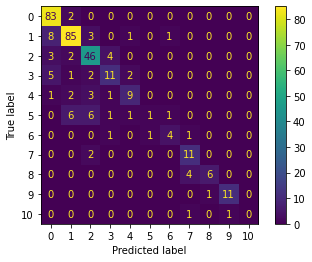

In [55]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [56]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        85
           1       0.87      0.87      0.87        98
           2       0.74      0.84      0.79        55
           3       0.61      0.52      0.56        21
           4       0.69      0.56      0.62        16
           5       0.50      0.06      0.11        16
           6       0.67      0.57      0.62         7
           7       0.65      0.85      0.73        13
           8       0.86      0.60      0.71        10
           9       0.92      0.92      0.92        12
          10       0.00      0.00      0.00         2

    accuracy                           0.80       335
   macro avg       0.67      0.61      0.62       335
weighted avg       0.78      0.80      0.78       335



C:\Users\22490046962\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# <font color="green">Lojistik Regresyon ile Sınıflama ve Sonuçları</font>

Lojistik Regresyon kullanmak için 2'li sınıflama yapılması gerekmektedir bu nedenle veri seti 2'ye bölünecektir, max ve min değerleri kontrol edildiğinde 30000 sınırının uygun olduğu düşünülmüştür.

In [57]:
veriSeti['charges_logistic'] = pd.cut(veriSeti["charges"], bins=[0, 30000,100000],
                    labels=[0,1])
veriSeti['charges_logistic']=veriSeti['charges_logistic'].astype(int)

In [58]:
from sklearn import linear_model

In [59]:
X = veriSeti.iloc[:,0:6] 
y = veriSeti.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [60]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [61]:
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(model.intercept_,model.coef_)

[-4.87963333] [[ 0.25838616  0.13598807  1.81443815  0.19196917  2.62777904 -0.12103944]]


In [63]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[291,   0],
       [  7,  37]], dtype=int64)

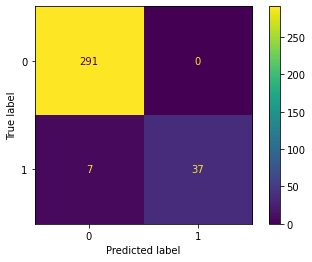

In [64]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [65]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       291
           1       1.00      0.84      0.91        44

    accuracy                           0.98       335
   macro avg       0.99      0.92      0.95       335
weighted avg       0.98      0.98      0.98       335



Region değişkeni çıkarılarak tekrar analiz edilecektir.

In [66]:
veriSeti1=veriSeti.copy()
veriSeti1.drop("region",axis=1,inplace=True)
X = veriSeti1.iloc[:,0:5] 
y = veriSeti1.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [67]:
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(model.intercept_,model.coef_)

[-13.97515836] [[0.01497243 0.26792237 0.25279066 0.12952941 5.51620266]]


In [68]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[291,   0],
       [  6,  38]], dtype=int64)

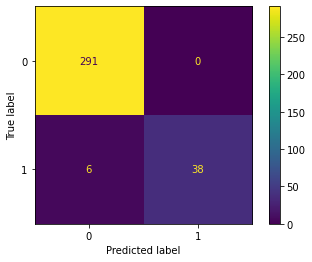

In [69]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [70]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       291
           1       1.00      0.86      0.93        44

    accuracy                           0.98       335
   macro avg       0.99      0.93      0.96       335
weighted avg       0.98      0.98      0.98       335



sex değişkeni çıkarılarak tekrar analiz edilecektir.

In [71]:
veriSeti2=veriSeti1.copy()
veriSeti2.drop("sex",axis=1,inplace=True)
X = veriSeti2.iloc[:,0:4] 
y = veriSeti2.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [72]:
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(model.intercept_,model.coef_)

[-13.89448539] [[0.01413851 0.25509242 0.13884789 5.53844494]]


In [74]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[291,   0],
       [  8,  36]], dtype=int64)

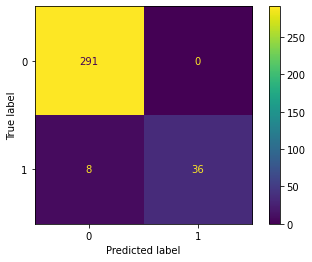

In [75]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [76]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       291
           1       1.00      0.82      0.90        44

    accuracy                           0.98       335
   macro avg       0.99      0.91      0.94       335
weighted avg       0.98      0.98      0.98       335



# <font color="green"> K-en yakın komşu (k-Nearest Neighbors classifier)</font>

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
X = veriSeti.iloc[:,0:6] 
y = veriSeti.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [80]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[288,   3],
       [ 42,   2]], dtype=int64)

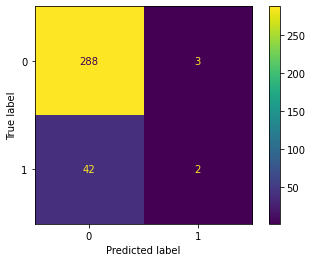

In [81]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [82]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       291
           1       0.40      0.05      0.08        44

    accuracy                           0.87       335
   macro avg       0.64      0.52      0.50       335
weighted avg       0.81      0.87      0.82       335



Region değişkeni çıkarılarak tekrar analiz edilecektir.

In [83]:
veriSeti1=veriSeti.copy()
veriSeti1.drop("region",axis=1,inplace=True)
X = veriSeti1.iloc[:,0:5] 
y = veriSeti1.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [84]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [85]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[287,   4],
       [ 39,   5]], dtype=int64)

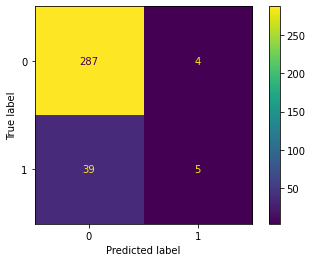

In [86]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [87]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       291
           1       0.56      0.11      0.19        44

    accuracy                           0.87       335
   macro avg       0.72      0.55      0.56       335
weighted avg       0.84      0.87      0.83       335



Sex değişkeni çıkarılarak tekrar analiz edilecektir.

In [88]:
veriSeti2=veriSeti1.copy()
veriSeti2.drop("sex",axis=1,inplace=True)
X = veriSeti2.iloc[:,0:4] 
y = veriSeti2.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [89]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [90]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[288,   3],
       [ 41,   3]], dtype=int64)

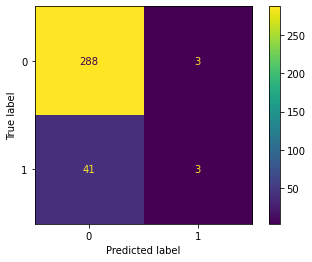

In [91]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [92]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       291
           1       0.50      0.07      0.12        44

    accuracy                           0.87       335
   macro avg       0.69      0.53      0.52       335
weighted avg       0.83      0.87      0.82       335



# <font color="green"> Sonuç </font>

Accuracy değerlerine bakıldığında Karar Ağaçları modeline en yüksek değer 0.72, Random Forest modelinde 0.80, Lojistik Regresyon modeline göre 0.98, K en yakın komşuya göre 0.87 çıkmıştır. Sonuçlar Karar ağaçları algoritması dışında yüksek değerler çıkmıştır ancak Lojistik Regresyon modelinde 0.98 ile en yüksek sonuca ulaşmıştır.insurance veri seti için en iyi algoritmanın Lojistik Regresyon olduğu düşünülmektedir.